# US Churn &mdash; EDA

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
plt.style.use("seaborn-darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "US_Churn"

COLAB = 'google.colab' in sys.modules
if COLAB:
    ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
else:
    ROOT = "./"

DEBUG = False
SEED = 1612

In [2]:
if COLAB:
    from google.colab import drive
    if not os.path.isdir("/content/gdrive"):
        drive.mount("/content/gdrive")

## Datasets

In [3]:
df = pd.read_pickle(f"{ROOT}/data/churn.pkl")
print(df.shape)
df.head()

(3333, 20)


,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,2,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,0,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State           3333 non-null   category
 1   Account_Length  3333 non-null   int64   
 2   Area_Code       3333 non-null   category
 3   Intl_Plan       3333 non-null   category
 4   VMail_Plan      3333 non-null   category
 5   VMail_Message   3333 non-null   int64   
 6   Day_Mins        3333 non-null   float64 
 7   Day_Calls       3333 non-null   int64   
 8   Day_Charge      3333 non-null   float64 
 9   Eve_Mins        3333 non-null   float64 
 10  Eve_Calls       3333 non-null   int64   
 11  Eve_Charge      3333 non-null   float64 
 12  Night_Mins      3333 non-null   float64 
 13  Night_Calls     3333 non-null   int64   
 14  Night_Charge    3333 non-null   float64 
 15  Intl_Mins       3333 non-null   float64 
 16  Intl_Calls      3333 non-null   int64   
 17  Intl_Charge   

## Target and Features

In [5]:
target = "Churn"
cat_features = [c for c in df.select_dtypes("category").columns if c not in target]
num_features = [c for c in df.select_dtypes(["int","float"]).columns if c not in target]

print(f"Traget: {target}")

print(f"Categorical Features: {cat_features}")
print(f"Numerical Features: {num_features}")

Traget: Churn
Categorical Features: ['State', 'Area_Code', 'Intl_Plan', 'VMail_Plan']
Numerical Features: ['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls']


### Target

In [6]:
df[target].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

**Comments**

 * Binary classification problem
 * Unbalanced - a dumb classifier (alwayys predicting 0) will have accuracy of 85.5%

In [7]:
columns = list(df.select_dtypes('category'))
columns.remove(target)
print(columns)

['State', 'Area_Code', 'Intl_Plan', 'VMail_Plan']


### State

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
CO     66
NV     66
WA     66
RI     65
MS     65
MA     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

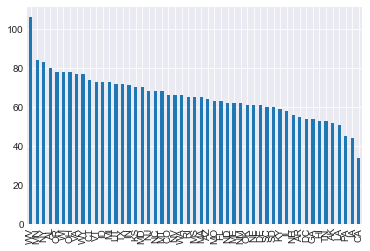

### Area_Code

0    1655
1     840
2     838
Name: Area_Code, dtype: int64

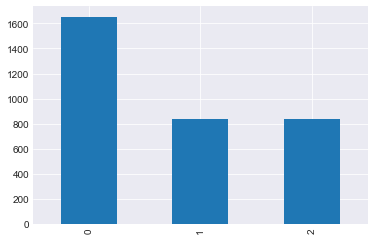

### Intl_Plan

0    3010
1     323
Name: Intl_Plan, dtype: int64

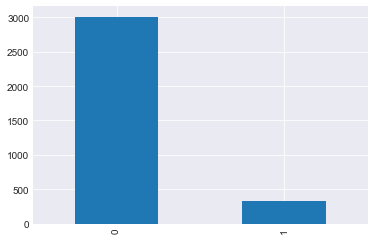

### VMail_Plan

0    2411
1     922
Name: VMail_Plan, dtype: int64

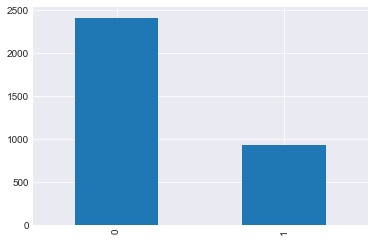

In [8]:
for c in columns:
    display(Markdown(f"### {c}"))
    display(df[c].value_counts(dropna = False))
    df[c].value_counts().plot(kind = "bar")
    plt.show()

In [9]:
columns = list(df.select_dtypes(['int','float']).columns)
print(columns)

['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls']


### Account_Length

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account_Length, dtype: float64

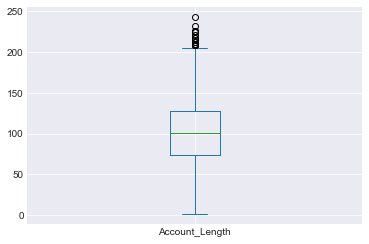

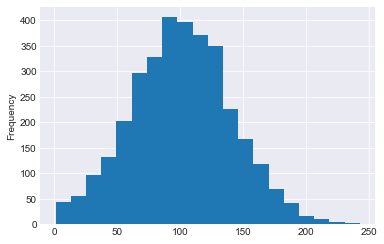

### VMail_Message

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: VMail_Message, dtype: float64

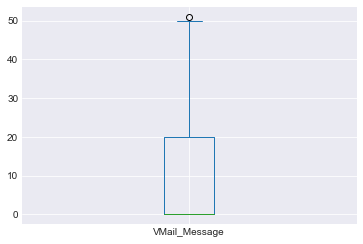

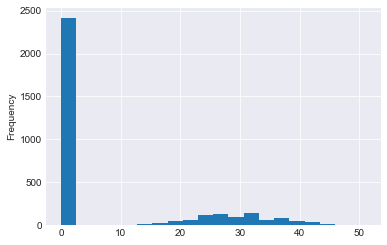

### Day_Mins

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Day_Mins, dtype: float64

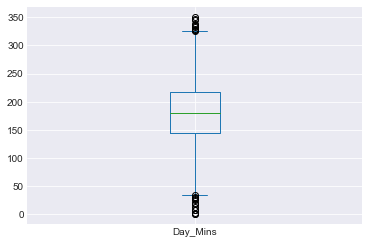

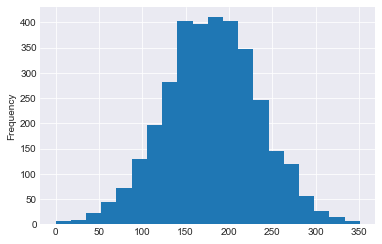

### Day_Calls

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day_Calls, dtype: float64

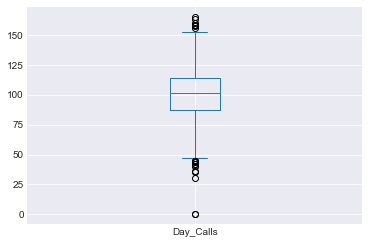

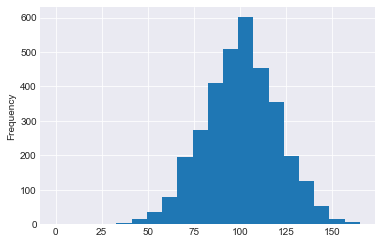

### Day_Charge

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: Day_Charge, dtype: float64

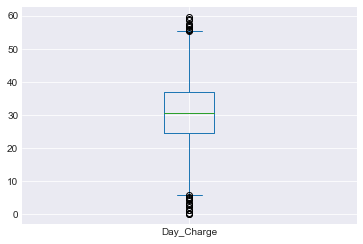

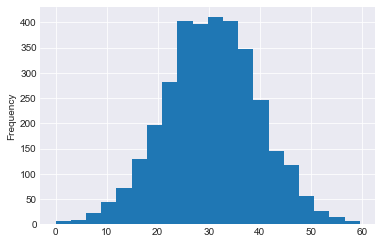

### Eve_Mins

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: Eve_Mins, dtype: float64

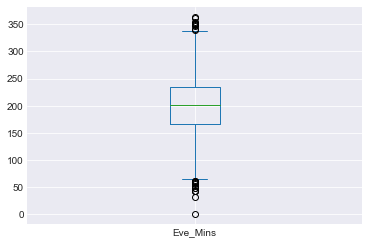

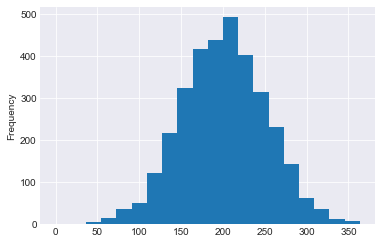

### Eve_Calls

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: Eve_Calls, dtype: float64

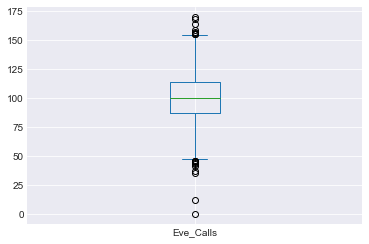

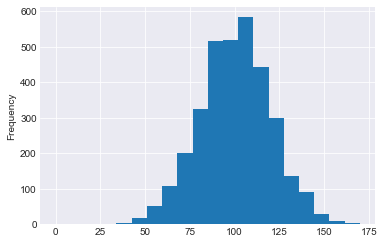

### Eve_Charge

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: Eve_Charge, dtype: float64

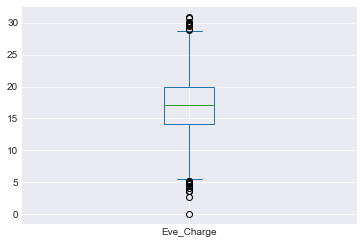

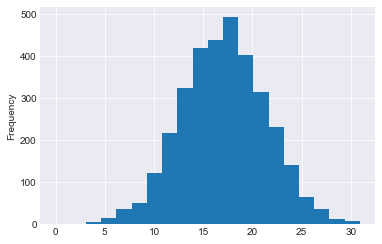

### Night_Mins

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Night_Mins, dtype: float64

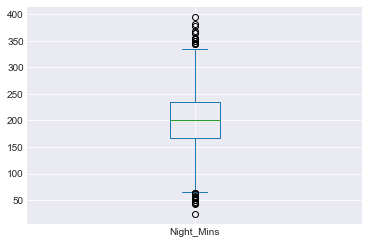

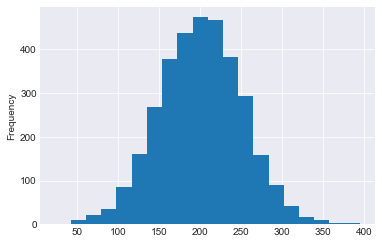

### Night_Calls

count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: Night_Calls, dtype: float64

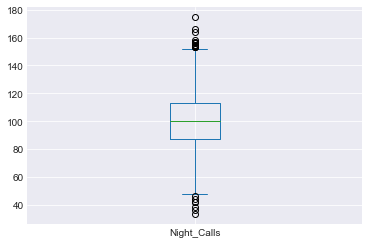

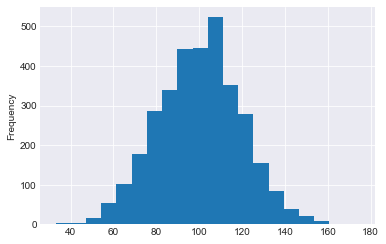

### Night_Charge

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: Night_Charge, dtype: float64

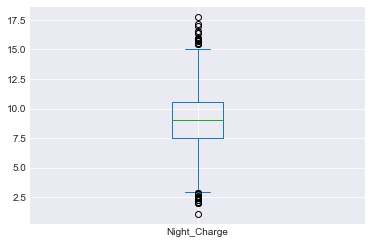

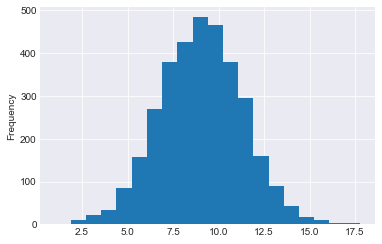

### Intl_Mins

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: Intl_Mins, dtype: float64

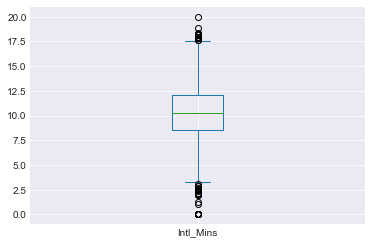

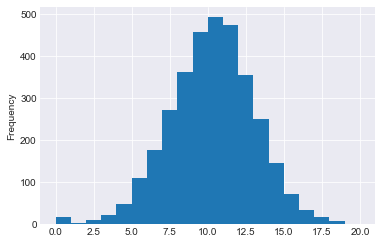

### Intl_Calls

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Intl_Calls, dtype: float64

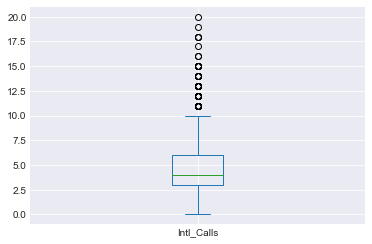

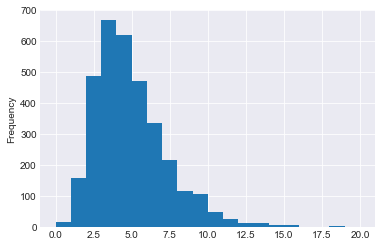

### Intl_Charge

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: Intl_Charge, dtype: float64

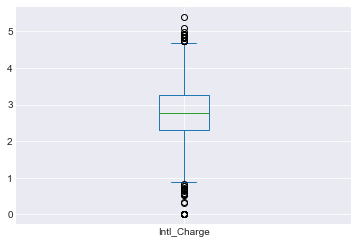

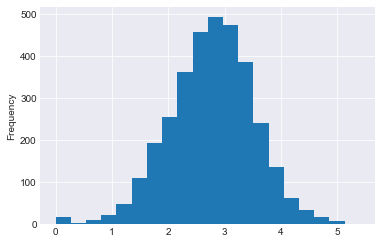

### CustServ_Calls

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustServ_Calls, dtype: float64

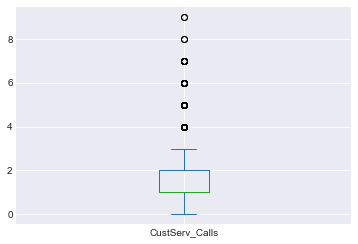

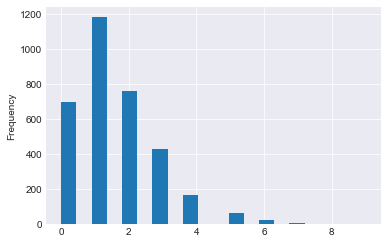

In [10]:
for c in columns:
    display(Markdown(f"### {c}"))
    display(df[c].describe())
    df[c].plot(kind = "box")
    plt.show()
    df[c].plot(kind = "hist", bins = 20)
    plt.show()